In [130]:
import pandas as pd
import numpy as np
import pickle

In [272]:
#train_region = "Austin"
#test_region = "SanDiego"
test_region = "Austin"
train_region = "SanDiego"
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))

train_df = out_overall[train_region]
test_df = out_overall[test_region]
#transform = "DD"
k=3
transformations = ["DD","None",'median-aggregate']
transformations = ['DD','None',"DD-fridge"]

In [273]:
out = {}
for transform in transformations:
    out[transform] = {}
    #for appliance in ["hvac","fridge","dr","wm"]:
    for appliance in ['fridge']:
        out[transform][appliance] = {}
        for month in range(1,13):
            print appliance, month, transform
            out[transform][appliance][month] = []
            for test_home in test_df.index:
                try:
                    pred =  pickle.load(open('../data/output/ineq_cross/%s_%s_%s_%s_%d_%d_%d.pkl' %(train_region,
                                                                                               test_region,
                                                                                               transform,
                                                                                               appliance,
                                                                                               month,
                                                                                               test_home,
                                                                                               k),'r'))
                    gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                    error = np.abs(gt-pred)
                    percentage_error = error*100/gt
                    if percentage_error>100:
                        percentage_error=100
                    percentage_accuracy = 100-percentage_error
                    out[transform][appliance][month].append(percentage_accuracy)
                except Exception, e:
                    pass

            


fridge 1 DD
fridge 2 DD
fridge 3 DD
fridge 4 DD
fridge 5 DD
fridge 6 DD
fridge 7 DD
fridge 8 DD
fridge 9 DD
fridge 10 DD
fridge 11 DD
fridge 12 DD
fridge 1 None
fridge 2 None
fridge 3 None
fridge 4 None
fridge 5 None
fridge 6 None
fridge 7 None
fridge 8 None
fridge 9 None
fridge 10 None
fridge 11 None
fridge 12 None
fridge 1 DD-fridge
fridge 2 DD-fridge
fridge 3 DD-fridge
fridge 4 DD-fridge
fridge 5 DD-fridge
fridge 6 DD-fridge
fridge 7 DD-fridge
fridge 8 DD-fridge
fridge 9 DD-fridge
fridge 10 DD-fridge
fridge 11 DD-fridge
fridge 12 DD-fridge


In [274]:
acc = {tr:{} for tr in transformations}

acc['Regional average']={}

In [275]:
for transform in transformations:
    #for appliance in ["hvac","fridge","wm"]:
    for appliance in ["fridge"]:    
        acc[transform][appliance] = {}
        for month in range(1,13):
            acc[transform][appliance][month] = pd.Series(out[transform][appliance][month]).mean()

In [276]:
%matplotlib inline

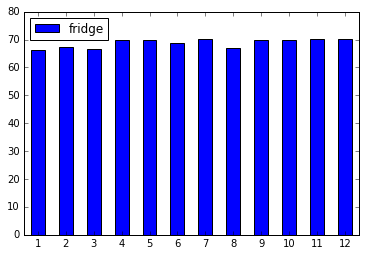

In [277]:
pd.DataFrame(acc['DD']).plot(kind='bar',rot=0)

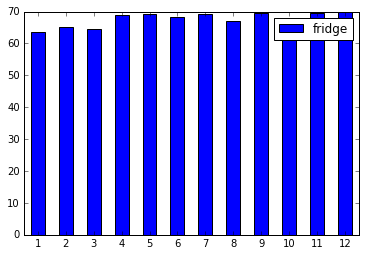

In [278]:
pd.DataFrame(acc['None']).plot(kind='bar',rot=0)

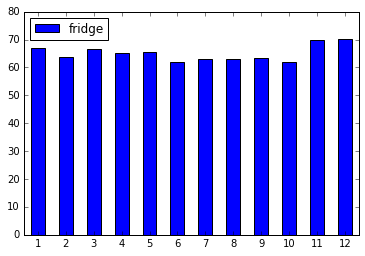

In [279]:
pd.DataFrame(acc['DD-fridge']).plot(kind='bar',rot=0)

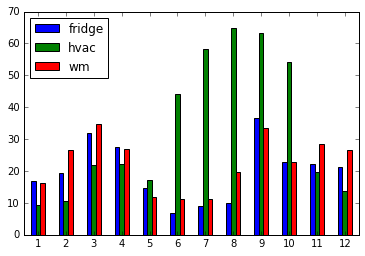

In [194]:
pd.DataFrame(acc['median-aggregate']).plot(kind='bar',rot=0)

In [280]:
contri = {
    'Austin':
    {'Cooling':{'wm':0.01,
    'hvac':0.29,
    'fridge':0.09},
    'Heating':
    {'wm':.01,'hvac':0.07,'fridge':0.09}}
    
    ,
    'SanDiego':
    {'wm':0.01,
    'hvac':.16,
    'fridge':0.15}
}

In [281]:
for appliance in ["fridge"]:
    acc['Regional average'][appliance] = {}
    for month in range(1,13):
        acc['Regional average'][appliance][month] = []
        for test_home in test_df.index:
            try:
                if month in range(3, 11):
                    pred = test_df.ix[test_home]['aggregate_%d' %month]*contri[test_region]['Cooling'][appliance]
                else:
                    pred = test_df.ix[test_home]['aggregate_%d' %month]*contri[test_region]['Heating'][appliance]
                gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                error = np.abs(gt-pred)
                percentage_error = error*100/gt
                if percentage_error>100:
                    percentage_error=100
                percentage_accuracy = 100-percentage_error
                acc['Regional average'][appliance][month].append(percentage_accuracy)
            except Exception, e:
                print e
                
        acc['Regional average'][appliance][month] = pd.Series(acc['Regional average'][appliance][month]).mean()

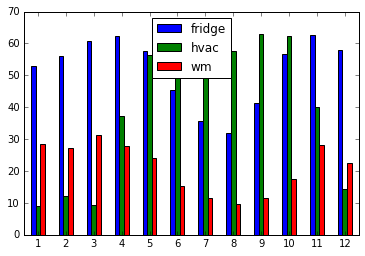

In [268]:

pd.DataFrame(acc['Regional average']).plot(kind='bar',rot=0)

In [269]:
pd.DataFrame(acc['Regional average'])['hvac']

1      9.004367
2     12.214557
3      9.343678
4     37.224065
5     56.366262
6     63.661751
7     58.715236
8     57.552838
9     63.129069
10    62.209776
11    40.059458
12    14.315241
Name: hvac, dtype: float64

In [271]:
pd.DataFrame(acc['DD'])['hvac']

1     12.087329
2     10.004737
3     23.409922
4     31.805008
5     33.801143
6     56.314415
7     63.602969
8     64.282721
9     61.703113
10    51.299250
11    29.067867
12     5.877054
Name: hvac, dtype: float64

In [261]:
pd.DataFrame(acc['Regional average'])['hvac']

1      9.004367
2     12.214557
3      9.343678
4     37.224065
5     56.366262
6     63.661751
7     58.715236
8     57.552838
9     63.129069
10    62.209776
11    40.059458
12    14.315241
Name: hvac, dtype: float64

In [70]:
import matplotlib.pyplot as plt

In [154]:
acc['Regional average'].keys()

[]

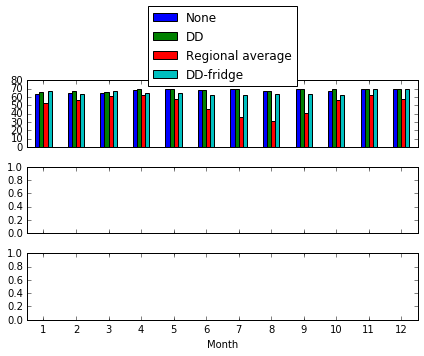

In [283]:
fig, ax = plt.subplots(nrows=3, sharex=True)
#for i, appliance in enumerate(["hvac","fridge","wm"]):
for i, appliance in enumerate(["fridge"]):

    ap_dict = {approach:acc[approach][appliance] for approach in acc.keys()}
    df = pd.DataFrame(ap_dict)
    df = df[['None','DD','Regional average','DD-fridge']]
    df.plot(ax=ax[i], kind='bar', title=appliance, rot= 0, legend=False)
plt.tight_layout()
lgd=ax[0].legend(bbox_to_anchor=(0.5,2.2), loc='upper center', ncol=1)
plt.xlabel("Month")
#plt.savefig('../results/dd_transform_sd_austin.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [287]:
pd.Series(acc['DD']['fridge']).mean()

68.77659836635122

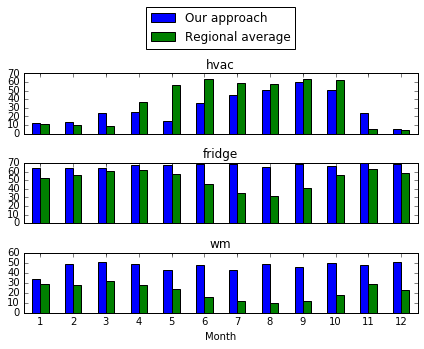

In [157]:
from IPython.display import Image
Image('../results/no_transform_sd_austin.png')

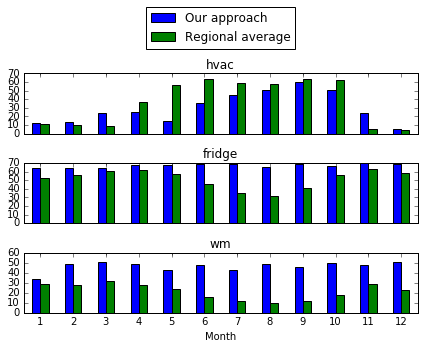

In [119]:
fig, ax = plt.subplots(nrows=3, sharex=True)
for i, appliance in enumerate(["hvac","fridge","wm"]):
    ap_dict = {approach:acc[approach][appliance] for approach in acc.keys()}
    df = pd.DataFrame(ap_dict)
    df.plot(ax=ax[i], kind='bar', title=appliance, rot= 0, legend=False)
plt.tight_layout()
lgd=ax[0].legend(bbox_to_anchor=(0.5,2.2), loc='upper center', ncol=1)
plt.xlabel("Month")
#

#plt.savefig('../results/no_transform_sd_austin.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [73]:
ap_dict

{'Our approach': {1: 33.8734504582082,
  2: 48.67136857405774,
  3: 50.31158734130758,
  4: 48.937788635189555,
  5: 42.91586645201225,
  6: 47.54102296541092,
  7: 42.690949812235495,
  8: 48.85646634271478,
  9: 45.31713598166896,
  10: 49.332064873332705,
  11: 47.12320106158118,
  12: 50.861510015694236},
 'Regional average': {1: 33.8734504582082,
  2: 48.67136857405774,
  3: 50.31158734130758,
  4: 48.937788635189555,
  5: 42.91586645201225,
  6: 47.54102296541092,
  7: 42.690949812235495,
  8: 48.85646634271478,
  9: 45.31713598166896,
  10: 49.332064873332705,
  11: 47.12320106158118,
  12: 50.861510015694236}}

In [77]:
acc['Regional average']

{'fridge': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'hvac': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []},
 'wm': {1: [],
  2: [],
  3: [],
  4: [],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [],
  12: []}}

In [129]:
train_df['hvac_9'].mean()

218.4750300575705

In [128]:
test_df['hvac_9'].mean()

482.0247721723813

In [245]:
m = {}
for transform in transformations:
    m[transform] = {}
    for appliance in ["fridge"]:
       
        for month in range(1,13):
            m[transform][month]=[]
            
            out[transform][appliance][month] = []
            for test_home in test_df.index:
                try:
                    pred =  pickle.load(open('../data/output/ineq_cross/%s_%s_%s_%s_%d_%d_%d.pkl' %(train_region,
                                                                                               test_region,
                                                                                               transform,
                                                                                               appliance,
                                                                                               month,
                                                                                               test_home,
                                                                                               k),'r'))
                    gt = test_df.ix[test_home]['%s_%d' %(appliance, month)]
                    error = np.abs(gt-pred)
                    percentage_error = error*100/gt
                    if percentage_error>100:
                        percentage_error=100
                    percentage_accuracy = 100-percentage_error
                    #print appliance, month, transform, gt-pred
                    m[transform][month].append(gt-pred)
                except Exception, e:
                    pass

            


In [246]:
pd.Series(m['DD'][7]).describe()

count    299.000000
mean       6.553594
std       32.121251
min      -57.424472
25%       -9.852161
50%        2.342088
75%       14.932602
max      328.898272
dtype: float64

In [247]:
a = {}
for transform in transformations:
    a[transform] = {}
    for month in range(1,13):
        a[transform][month] = pd.Series(m[transform][month]).mean()
    
    

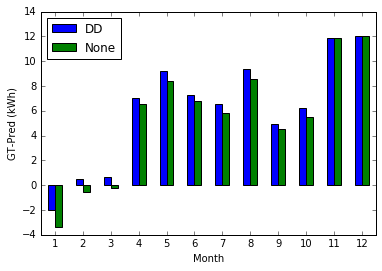

In [250]:
pd.DataFrame(a)[['DD','None']].plot(kind="bar",rot=0)
plt.xlabel("Month")
plt.ylabel("GT-Pred (kWh)")
#plt.savefig('../results/transform_strategy_hvac.png')

In [243]:
train_df['fridge_11'].mean(), test_df['fridge_11'].mean()

(36.504466090883525, 54.91064814108161)

46.137905111303894